# Healthcare_Analysis_Project_Capstone3

In [246]:
# We are doing the project on heart Disease survey . I this we have done some analysis in MySql now we are importing file from SQL the do some 
#EDA after that we train the module & check the accurancy of model 

In [247]:
# Importing the required all Libraries -

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error ,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [248]:
# COnnecting the My Sql Server - 
conn = pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Chinu@123',db='Health_project')
print('Connection Established',conn)

Connection Established <pymysql.connections.Connection object at 0x0000023730F7E6D0>


In [249]:
# importing data from Mysql data - 
data = pd.read_sql_query('Select *from Heart_csv',conn)
data.head(2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22784\1346425370.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('Select *from Heart_csv',conn)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39


In [250]:
# copying the 
df = data.copy()
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39


In [251]:
## Data Reading Basic Steps :-
## Data Reading Basic Steps :-
print('Min Age Group- ',df['age_group'].min())
print('Max Age Group- ',df['age_group'].max())
print('no of columns - \n' , df.columns)
print('no of shapes - ' , df.shape)
print('no of lenght - ' , len(df))
print('no of datatype - \n' , df.dtypes)

Min Age Group-  30-39
Max Age Group-  Under 30
no of columns - 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group'],
      dtype='object')
no of shapes -  (303, 15)
no of lenght -  303
no of datatype - 
 age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
target         int64
age_group     object
dtype: object


In [252]:
print('DataSet Information -\n',df.describe())

DataSet Information -
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std 

In [253]:
# Checking the null missing value - 
print ("The Mising Report - \n",df.isnull().sum())

The Mising Report - 
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64


-0.791335191480832


C:\Users\DELL\AppData\Local\Temp\ipykernel_22784\2323861018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = df['sex'])
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


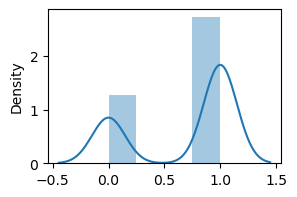

In [254]:
plt.figure(figsize=(3,2))
sns.distplot( x = df['sex'])
print (df['sex'].skew())

In [255]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39


In [256]:
df = df.drop('age_group', axis=1)

In [257]:
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-49
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-59
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-59


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


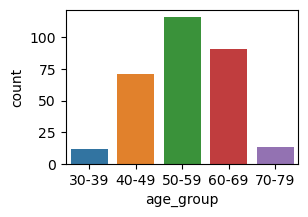

In [258]:
# Distribution of age groups
plt.figure(figsize=(3,2))
sns.countplot(x='age_group', data=df)
plt.show()

In [259]:
df = df.drop('age_group', axis=1)

In [260]:
### standardize the data for algorithms that rely on distance measures

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop(columns=['target'])
features_scaled = scaler.fit_transform(features)

In [261]:
## Training the model - 
from sklearn.model_selection import train_test_split
X = features_scaled
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [262]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [263]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8351648351648352
Confusion Matrix:
 [[32  9]
 [ 6 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [264]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8131868131868132


In [265]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8791208791208791


In [266]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8131868131868132
